In [1]:
import pickle
import pandas as pd
X = pd.read_pickle('trainX.pickle')
y = pd.read_pickle('trainY.pickle')

In [2]:
print(X.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras import backend as K

Using TensorFlow backend.


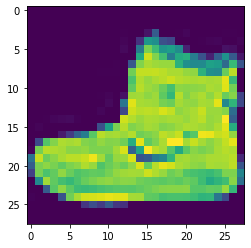

(28, 28)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

img = X[0]
plt.imshow(img)
plt.show()
print(img.shape)

#pre-processing

In [5]:
img_rows,img_cols=28,28

In [6]:
batch_size=120
num_classes=10
epochs=25

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [9]:
X_train = X_train.astype('float32')
X_train /= 255
X_test=X_test.astype('float32')
X_test/=255

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('x_train shape ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape  (48000, 28, 28, 1)
48000 train samples
12000 test samples


In [11]:
X_train=X_train.reshape(48000,784)
X_test=X_test.reshape(12000,784)

In [12]:
model = Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

W0623 11:02:03.205559 11128 deprecation_wrapper.py:119] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 11:02:03.841955 11128 deprecation_wrapper.py:119] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 11:02:03.841955 11128 deprecation_wrapper.py:119] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 11:02:03.958408 11128 deprecation_wrapper.py:119] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.comp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

W0623 11:02:09.213339 11128 deprecation.py:323] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 11:02:09.387815 11128 deprecation_wrapper.py:119] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 19s 388us/step - loss: 0.5875 - acc: 0.7861 - val_loss: 0.4101 - val_acc: 0.8486
Epoch 2/25
48000/48000 [==============================] - 16s 340us/step - loss: 0.4000 - acc: 0.8531 - val_loss: 0.3621 - val_acc: 0.8688
Epoch 3/25
48000/48000 [==============================] - 15s 321us/step - loss: 0.3565 - acc: 0.8672 - val_loss: 0.3513 - val_acc: 0.8668
Epoch 4/25
48000/48000 [==============================] - 15s 309us/step - loss: 0.3274 - acc: 0.8791 - val_loss: 0.3378 - val_acc: 0.8750
Epoch 5/25
48000/48000 [==============================] - 15s 319us/step - loss: 0.3050 - acc: 0.8853 - val_loss: 0.3341 - val_acc: 0.8777
Epoch 6/25
48000/48000 [==============================] - 15s 318us/step - loss: 0.2860 - acc: 0.8935 - val_loss: 0.3147 - val_acc: 0.8869
Epoch 7/25
48000/48000 [==============================] - 14s 294us/step - loss: 0.2710 - acc: 0.8972 - val_loss: 0.

# CNN model

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [16]:
X_train = X_train.astype('float32')
X_train /= 255
X_test=X_test.astype('float32')
X_test/=255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('x_train shape ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape  (48000, 28, 28, 1)
48000 train samples
12000 test samples


In [17]:
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [18]:
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

W0623 11:08:50.489667 11128 deprecation_wrapper.py:119] From c:\users\puni\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               147584    
__________

In [19]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 78s 2ms/step - loss: 0.5359 - acc: 0.8036 - val_loss: 0.3585 - val_acc: 0.8697
Epoch 2/25
48000/48000 [==============================] - 72s 2ms/step - loss: 0.3439 - acc: 0.8736 - val_loss: 0.3288 - val_acc: 0.8751
Epoch 3/25
48000/48000 [==============================] - 69s 1ms/step - loss: 0.2945 - acc: 0.8924 - val_loss: 0.2799 - val_acc: 0.8970
Epoch 4/25
48000/48000 [==============================] - 69s 1ms/step - loss: 0.2638 - acc: 0.9023 - val_loss: 0.2637 - val_acc: 0.9069
Epoch 5/25
48000/48000 [==============================] - 71s 1ms/step - loss: 0.2392 - acc: 0.9115 - val_loss: 0.2677 - val_acc: 0.9037
Epoch 6/25
48000/48000 [==============================] - 71s 1ms/step - loss: 0.2181 - acc: 0.9191 - val_loss: 0.2535 - val_acc: 0.9069
Epoch 7/25
48000/48000 [==============================] - 70s 1ms/step - loss: 0.1980 - acc: 0.9263 - val_loss: 0.2408 - val_acc

In [20]:
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Test loss: 0.4453360798944098
Test accuracy: 0.913


In [21]:
test=pd.read_pickle("testX.pickle")

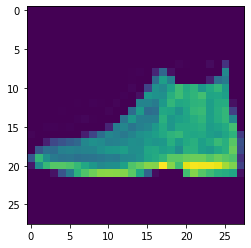

In [22]:
plt.imshow(test[0])
plt.show()

In [23]:
X_test=test
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_test=X_test.astype('float32')
X_test/=255

In [24]:
predictions = model.predict_classes([X_test])
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [25]:
import numpy as np
np.unique(predictions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [26]:
file=open("results.pickle","wb")
pickle.dump(predictions, file)